<a href="https://colab.research.google.com/github/kashishthakur26/Bit_coin_predictor_deep_learing/blob/main/Deep_dream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

## Loading the pre-built convolution NN

In [19]:
base_model = tf.keras.applications.InceptionV3(include_top=False , weights = 'imagenet')


87910968/87910968 [==============================] - 4s 0us/step


In [20]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

In [21]:
len(base_model.layers)

311

In [22]:
names = ['mixed3','mixed5']

In [24]:
base_model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [25]:
layers = [base_model.get_layer(name).output for name in names]

In [26]:
layers

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

In [27]:
deep_dream_model = tf.keras.Model(inputs = base_model.input , outputs = layers)

## Loading and the preprocessing the images

In [28]:
image = tf.keras.preprocessing.image.load_img('/content/Images/StaryNight.jpg',
                                              target_size = (225 , 375))

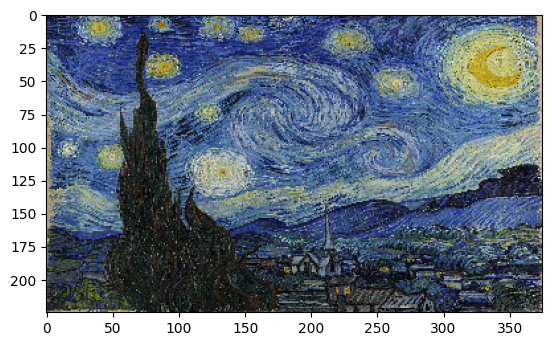

In [29]:
plt.imshow(image)

In [30]:
image = tf.keras.preprocessing.image.img_to_array(image)

In [31]:
image = tf.keras.applications.inception_v3.preprocess_input(image)

## Getting the activations

In [32]:
image_batch = tf.expand_dims(image , axis=0)

In [33]:
activations = deep_dream_model.predict(image_batch)

1/1 [==============================] - 1s 1s/step
